# Quick Overview  
We use <a href='https://brickschema.org/'>Brick</a> and <a href='https://mortardata.org/intro.html'>Mortar</a> to evalute long-term thermal comfort across 25 buildings. All analytic graphs and tables in our ASHRAE paper are reproducible here. You don't need to do anything except running the cell by sequence, but feel free to try something different. Have fun!

v0.7; November 2021

## Connect to Mortar API

In [1]:
import pymortar
# build a client to Mortar frontend server
client = pymortar.Client("https://beta-api.mortardata.org")

In [2]:
# check pymortar version == 2.0.5
!pip show pymortar

Name: pymortar
Version: 2.0.5
Summary: 
Home-page: None
Author: Gabe Fierro
Author-email: gtfierro@cs.berkeley.edu
License: None
Location: /opt/anaconda3/lib/python3.8/site-packages
Requires: requests, brickschema, python-snappy, pyarrow, toml, pandas, googleapis-common-protos, rdflib
Required-by: 


## Write a Brick metadata model query

In [3]:
# the query could be just zone air temperature sensor or with other related entities
query = """SELECT ?sensor ?zone ?vav ?room ?floor ?ahu WHERE {{
    ?sensor a brick:Zone_Air_Temperature_Sensor .
    ?sensor brick:isPointOf ?vav .
    ?vav brick:feeds ?zone .
    ?zone a brick:HVAC_Zone .
    ?zone brick:hasPart ?room .
    ?room a brick:Room .
    ?room brick:isPartOf ?floor .
    ?floor a brick:Floor .
    ?ahu a brick:AHU .
    ?ahu brick:feeds ?vav .
}}"""

In [4]:
# get which sites return results for the query above
qualify_resp = client.qualify([query])
print("Mortar has {0} qualifed sites".format(len(qualify_resp.sites)))
print(qualify_resp.sites)

Mortar has 25 qualifed sites
['artx', 'bwfp', 'chem', 'chemx', 'crus', 'dh', 'fdpd', 'gbsf', 'gha_ics', 'giedt', 'hart', 'hwc', 'mann', 'msb', 'music', 'roes', 'stor', 'thur', 'veih', 'vm3a', 'vmep', 'vmif', 'vmth', 'well', 'wsrc']


## Analysis - Discomfort Indices comparasion

In [5]:
from temp_mean import *
from temp_var import *
from degree_hours import *
from range_outlier import *
from daily_range_outlier import *
from combined_outlier import *
import pandas as pd
import random
import seaborn as sns
# display all content in a pd df column and discard warning info
pd.set_option('display.max_colwidth', None)
pd.set_option('mode.chained_assignment', None)

# assign values to index function input variables
sd = '2016-1-1'
ed = '2016-12-31'
sh = 9
eh = 17
sl = 71.6
su = 80.6
wl = 66.2
wu = 77.0
th = 2

### First, analyze a randomly selected building
Calculate each row in the metadata, in other words, calcualte each sensor or each zone's index value

<AxesSubplot:>

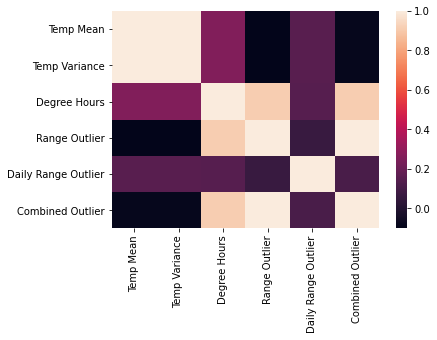

In [11]:
meta_bldg = client.sparql(query, sites=[random.choice(qualify_resp.sites)])
cor = []
for idxi, row in meta_bldg.iterrows():
    cor_row = {}
    md = row.sensor
    # calculate indices
    i_mean = temp_var(md, sd, ed, sh, eh)
    i_var = temp_var(md, sd, ed, sh, eh)
    i_dh = degree_hours(md, sd, ed, sh, eh, sl, su, wl, wu)
    i_ro = range_outlier(md, sd, ed, sh, eh, sl, su, wl, wu)
    i_dro = daily_range_outlier(md, sd, ed, sh, eh, th)
    i_c = combined_outlier(i_ro, i_dro)
    # assign each index values to a column in the dictionary
    cor_row['Temp Mean'] = i_mean
    cor_row['Temp Variance'] = i_var
    cor_row['Degree Hours'] = i_dh
    cor_row['Range Outlier'] = i_ro
    cor_row['Daily Range Outlier'] = i_dro
    cor_row['Combined Outlier'] = i_c
    cor += [cor_row]
# 
cor_df = pd.DataFrame(cor)
sns.heatmap(cor_df.corr())

In [32]:
random.choice(qualify_resp.sites)

'thur'

In [33]:
meta_bldg = client.sparql(query, sites=['thur'])
meta_bldg

,sensor,zone,vav,room,floor,ahu,site
0,http://buildsys.org/ontologies/THUR#THUR.ZONE.AC04.RM1303.Zone_Air_Temp,http://buildsys.org/ontologies/THUR#RM1303,http://buildsys.org/ontologies/THUR#VAVRM1303,http://buildsys.org/ontologies/THUR#RM1303_room,http://buildsys.org/ontologies/THUR#floor1,http://buildsys.org/ontologies/THUR#AC04,thur
1,http://buildsys.org/ontologies/THUR#THUR.ZONE.AC03.RM1225C.Zone_Air_Temp,http://buildsys.org/ontologies/THUR#RM1225C,http://buildsys.org/ontologies/THUR#VAVRM1225C,http://buildsys.org/ontologies/THUR#RM1225C_room,http://buildsys.org/ontologies/THUR#floor1,http://buildsys.org/ontologies/THUR#AC03,thur
2,http://buildsys.org/ontologies/THUR#THUR.ZONE.AC01.RM1163.Zone_Air_Temp,http://buildsys.org/ontologies/THUR#RM1163,http://buildsys.org/ontologies/THUR#VAVRM1163,http://buildsys.org/ontologies/THUR#RM1163_room,http://buildsys.org/ontologies/THUR#floor1,http://buildsys.org/ontologies/THUR#AC01,thur
3,http://buildsys.org/ontologies/THUR#THUR.ZONE.AC01.RM1165.Zone_Air_Temp,http://buildsys.org/ontologies/THUR#RM1165,http://buildsys.org/ontologies/THUR#VAVRM1165,http://buildsys.org/ontologies/THUR#RM1165_room,http://buildsys.org/ontologies/THUR#floor1,http://buildsys.org/ontologies/THUR#AC01,thur
4,http://buildsys.org/ontologies/THUR#THUR.ZONE.AC03.RM1210A.Zone_Air_Temp,http://buildsys.org/ontologies/THUR#RM1210A,http://buildsys.org/ontologies/THUR#VAVRM1210A,http://buildsys.org/ontologies/THUR#RM1210A_room,http://buildsys.org/ontologies/THUR#floor1,http://buildsys.org/ontologies/THUR#AC03,thur
5,http://buildsys.org/ontologies/THUR#THUR.ZONE.AC01.RM1131.Zone_Air_Temp,http://buildsys.org/ontologies/THUR#RM1131,http://buildsys.org/ontologies/THUR#VAVRM1131,http://buildsys.org/ontologies/THUR#RM1131_room,http://buildsys.org/ontologies/THUR#floor1,http://buildsys.org/ontologies/THUR#AC01,thur
6,http://buildsys.org/ontologies/THUR#THUR.ZONE.AC01.RM1113.Zone_Air_Temp,http://buildsys.org/ontologies/THUR#RM1113,http://buildsys.org/ontologies/THUR#VAVRM1113,http://buildsys.org/ontologies/THUR#RM1113_room,http://buildsys.org/ontologies/THUR#floor1,http://buildsys.org/ontologies/THUR#AC01,thur
7,http://buildsys.org/ontologies/THUR#THUR.ZONE.AC03.RM1264.Zone_Air_Temp,http://buildsys.org/ontologies/THUR#RM1264,http://buildsys.org/ontologies/THUR#VAVRM1264,http://buildsys.org/ontologies/THUR#RM1264_room,http://buildsys.org/ontologies/THUR#floor1,http://buildsys.org/ontologies/THUR#AC03,thur
8,http://buildsys.org/ontologies/THUR#THUR.ZONE.AC03.RM1225D.Zone_Air_Temp,http://buildsys.org/ontologies/THUR#RM1225D,http://buildsys.org/ontologies/THUR#VAVRM1225D,http://buildsys.org/ontologies/THUR#RM1225D_room,http://buildsys.org/ontologies/THUR#floor1,http://buildsys.org/ontologies/THUR#AC03,thur
9,http://buildsys.org/ontologies/THUR#THUR.ZONE.AC02.RM1232.Zone_Air_Temp,http://buildsys.org/ontologies/THUR#RM1232,http://buildsys.org/ontologies/THUR#VAVRM1232,http://buildsys.org/ontologies/THUR#RM1232_room,http://buildsys.org/ontologies/THUR#floor1,http://buildsys.org/ontologies/THUR#AC02,thur


In [35]:
from overheating_outlier import *
from overcooling_outlier import *
import re
diag = []
for idxi, row in meta_bldg.iterrows():
    diag_row = {}
    md = row.sensor
    # calculate indices
    i_ro = range_outlier(md, sd, ed, sh, eh, sl, su, wl, wu)
    i_oc = overcooling_outlier(md, sd, ed, sh, eh, sl, wl)
    i_oh = overheating_outlier(md, sd, ed, sh, eh, su, wu)
    # assign each index values to a column in the dictionary
    for k in meta_bldg.columns:
        diag_row[k] = 'Zon_Air_Temp' if k == 'sensor' else re.split('[#]', row[k])[-1]
    diag_row['Range Outlier'] = i_ro
    diag_row['Overcooling Outlier'] = i_oc
    diag_row['Overheating Outlier'] = i_oh
    diag += [diag_row]
diag_df = pd.DataFrame(diag)
diag_df

,sensor,zone,vav,room,floor,ahu,site,Range Outlier,Overcooling Outlier,Overheating Outlier
0,Zon_Air_Temp,RM1303,VAVRM1303,RM1303_room,floor1,AC04,thur,0.00,0.00,0.00
1,Zon_Air_Temp,RM1225C,VAVRM1225C,RM1225C_room,floor1,AC03,thur,0.00,0.00,0.00
2,Zon_Air_Temp,RM1163,VAVRM1163,RM1163_room,floor1,AC01,thur,0.18,0.18,0.00
3,Zon_Air_Temp,RM1165,VAVRM1165,RM1165_room,floor1,AC01,thur,0.05,0.05,0.00
4,Zon_Air_Temp,RM1210A,VAVRM1210A,RM1210A_room,floor1,AC03,thur,0.00,0.00,0.00
5,Zon_Air_Temp,RM1131,VAVRM1131,RM1131_room,floor1,AC01,thur,0.01,0.01,0.00
6,Zon_Air_Temp,RM1113,VAVRM1113,RM1113_room,floor1,AC01,thur,0.06,0.06,0.00
7,Zon_Air_Temp,RM1264,VAVRM1264,RM1264_room,floor1,AC03,thur,0.07,0.07,0.00
8,Zon_Air_Temp,RM1225D,VAVRM1225D,RM1225D_room,floor1,AC03,thur,0.00,0.00,0.00
9,Zon_Air_Temp,RM1232,VAVRM1232,RM1232_room,floor1,AC02,thur,0.04,0.04,0.00


## Analyze all buildings in Mortar

<AxesSubplot:>

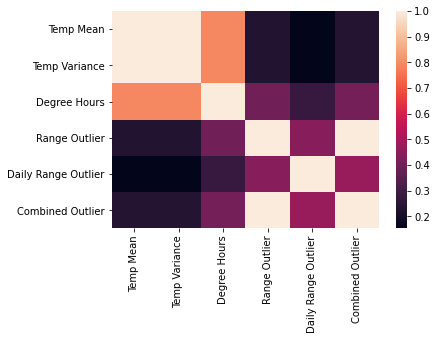

In [13]:
# get the brick metadata of the query sensors across all sites, except 'vmif'
meta_all = client.sparql(query, sites=qualify_resp.sites)
cor = []
for idxi, row in meta_all.iterrows():
    cor_row = {}
    md = row.sensor
    # calculate indices
    i_mean = temp_var(md, sd, ed, sh, eh)
    i_var = temp_var(md, sd, ed, sh, eh)
    i_dh = degree_hours(md, sd, ed, sh, eh, sl, su, wl, wu)
    i_ro = range_outlier(md, sd, ed, sh, eh, sl, su, wl, wu)
    i_dro = daily_range_outlier(md, sd, ed, sh, eh, th)
    i_c = combined_outlier(i_ro, i_dro)
    # assign each index values to a column in the dictionary
    cor_row['Temp Mean'] = i_mean
    cor_row['Temp Variance'] = i_var
    cor_row['Degree Hours'] = i_dh
    cor_row['Range Outlier'] = i_ro
    cor_row['Daily Range Outlier'] = i_dro
    cor_row['Combined Outlier'] = i_c
    cor += [cor_row]
# 
cor_df = pd.DataFrame(cor)
sns.heatmap(cor_df.corr())

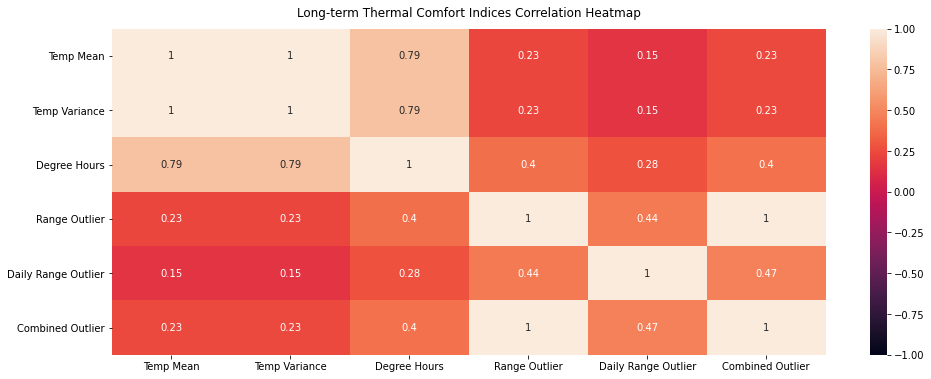

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(cor_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Long-term Thermal Comfort Indices Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [20]:
pd.DataFrame(cor)

,Temp Mean,Temp Variance,Degree Hours,Range Outlier,Daily Range Outlier,Combined Outlier
0,6.21,6.21,295.12,0.07,0.02,0.05
1,3.68,3.68,393.61,0.13,0.01,0.07
2,3.73,3.73,397.22,0.14,0.01,0.08
3,3.09,3.09,748.99,0.30,0.02,0.16
4,7.21,7.21,225.02,0.05,0.00,0.03
...,...,...,...,...,...,...
2106,9.08,9.08,726.20,0.18,0.03,0.10
2107,0.94,0.94,53.20,0.13,0.01,0.07
2108,1.71,1.71,137.99,0.11,0.01,0.06
2109,1.51,1.51,97.15,0.01,0.00,0.01


In [ ]:
res = []
for idxi, row in metadata_all.iterrows():
    res_row = {}
    md = row.sensor
    i_mean = temp_var(md, sd, ed, sh, eh)
    i_var = temp_var(md, sd, ed, sh, eh)
    i_dh = degree_hours(md, sd, ed, sh, eh, sl, su, wl, wu)
    i_ro = range_outlier(md, sd, ed, sh, eh, sl, su, wl, wu)
    i_dro = daily_range_outlier(md, sd, ed, sh, eh, th)
    i_c = combined_outlier = combined_outlier(i_ro, i_dro)
    
    for k in metadata_all.columns:
        res_row[k] = 'Zon_Air_Temp' if k == 'sensor' else re.split('[#]', row[k])[-1]
    res_row['ro_index'] = ro_p
    res_row['dro_index'] = dro_p
    res += [res_row]
    # print result
    print(res_row['site'], ro_p, dro_p)
# store the result list as a dataframe
res_df = pd.DataFrame(res)

In [58]:
res_df

,sensor,zone,vav,room,floor,ahu,site,ro_index,dro_index
0,Zon_Air_Temp,RM103,VAVRM103,RM103_room,floor1,AHU02,artx,0.03,0.01
1,Zon_Air_Temp,RM107B,VAVRM107B,RM107B_room,floor1,AHU01,artx,0.06,0.00
2,Zon_Air_Temp,RM112,VAVRM112,RM112_room,floor1,AHU02,artx,0.04,0.00
3,Zon_Air_Temp,RM110,VAVRM110,RM110_room,floor1,AHU02,artx,0.17,0.01
4,Zon_Air_Temp,RM115,VAVRM115,RM115_room,floor1,AHU01,artx,0.03,0.00
...,...,...,...,...,...,...,...,...,...
2106,Zon_Air_Temp,RM2100_MIX,VAVRM2100_MIX,RM2100_MIX_room,floor2,AHU03,wsrc,0.14,0.03
2107,Zon_Air_Temp,RM2110,VAVRM2110,RM2110_room,floor2,AHU03,wsrc,0.18,0.00
2108,Zon_Air_Temp,RM2204_MIX,VAVRM2204_MIX,RM2204_MIX_room,floor2,AHU03,wsrc,0.11,0.00
2109,Zon_Air_Temp,RM2202A_MIX,VAVRM2202A_MIX,RM2202A_MIX_room,floor2,AHU03,wsrc,0.01,0.00


<AxesSubplot:xlabel='ro_index', ylabel='dro_index'>

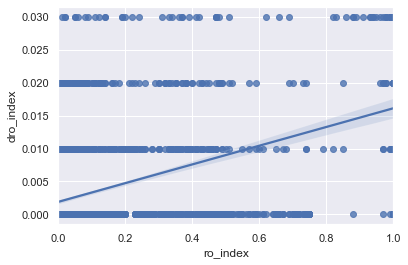

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)
sns.regplot(x="ro_index", y="dro_index", data=res_df)

<AxesSubplot:xlabel='ro_index', ylabel='dro_index'>

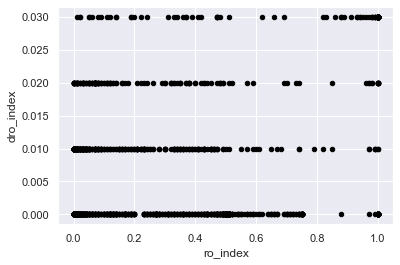

In [67]:
res_df.plot.scatter(x="ro_index", y="dro_index", c='Black/')

In [ ]:
}